In [84]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import matplotlib.dates as mdates
from scipy.stats import linregress
from api_keys import nas_api_key
from functools import reduce
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
from matplotlib.dates import AutoDateLocator, AutoDateFormatter, date2num
from decimal import Decimal


In [3]:
# Set the base URL api_key=fZZGHvCirnsxtCCmwm3W&transform=rdiff
url = "https://data.nasdaq.com/api/v3/datasets/RATEINF/CPI_USA.json?"
queryURLjson = f"{url}appid={nas_api_key}"

print(queryURLjson)

https://data.nasdaq.com/api/v3/datasets/RATEINF/CPI_USA.json?appid=fZZGHvCirnsxtCCmwm3W


In [2]:
# Set the base URL  api_key=fZZGHvCirnsxtCCmwm3W
url = "https://data.nasdaq.com/api/v3/datasets/RATEINF/CPI_USA.csv?"
queryURL = f"{url}appid={nas_api_key}"

print(queryURL)

# Define an empty list to fetch data 
#cpi_data = []

# Print to logger
#print("Beginning Data Retrieval    ")
#print("----------------------------")


https://data.nasdaq.com/api/v3/datasets/RATEINF/CPI_USA.csv?appid=fZZGHvCirnsxtCCmwm3W


In [4]:
# import data files
facebookDataPath = "data/Facebook.csv"
amazonDataPath = "data/Amazon.csv"
appleDataPath = "data/Apple.csv"
netflixDataPath = "data/Netflix.csv"
googleDataPath = "data/Google.csv"

# read and display the data
facebook_csv = pd.read_csv(facebookDataPath)
amazon_csv = pd.read_csv(amazonDataPath)
apple_csv = pd.read_csv(appleDataPath)
netflix_csv = pd.read_csv(netflixDataPath)
google_csv = pd.read_csv(googleDataPath)

In [5]:
# add a label column to each stock's dataset
facebook_csv.insert(0, "Label", "Facebook")
amazon_csv.insert(0, "Label", "Amazon")
apple_csv.insert(0, "Label", "Apple")
netflix_csv.insert(0, "Label", "Netlfix")
google_csv.insert(0, "Label", "Google")

In [6]:
# locate data only for 2022 -- rows 45 thru 295
fb = facebook_csv.iloc[44:294, :]
am = amazon_csv.iloc[44:294, :]
ap = apple_csv.iloc[44:294, :]
nf = netflix_csv.iloc[44:294, :]
gl = google_csv.iloc[44:294, :]

In [7]:
# merge the dataframes
merge1 = pd.merge(fb, am, how = "outer")
merge2 = pd.merge(merge1, ap, how = "outer")
merge3 = pd.merge(merge2, nf, how = "outer")
mergedData = pd.merge(merge3, gl, how = "outer")

# print mergedData to the output folder for troubleshooting purposes
mergedData.to_csv("output/printout.csv", index = False)

In [105]:
def clean_currency(x):
    if isinstance(x,str):
        return(x.replace('$','').replace(',',''))
    return(x)


In [8]:
mergedData.head()

,Label,Date,Close/Last,Volume,Open,High,Low
0,Facebook,12/29/22,$120.26,22366190,$116.40,$121.03,$115.77
1,Facebook,12/28/22,$115.62,19612470,$116.25,$118.15,$115.51
2,Facebook,12/27/22,$116.88,21392310,$117.93,$118.60,$116.05
3,Facebook,12/23/22,$118.04,17796630,$116.03,$118.18,$115.54
4,Facebook,12/22/22,$117.12,23618120,$117.20,$118.62,$114.38


In [163]:

# Define a function to create Linear Regression plots
# xAxis is independent variable
# yAxis is dependent variable
def linReg(xAxis,yAxis,x_lin_plot,y_lin_plot,yLabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xAxis, yAxis)
    regression = xAxis * slope + intercept
    linEQ = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
    plt.scatter(xAxis,yAxis)
    plt.plot(xAxis,regression,"r-")
    print(f"The r-value is {rvalue}")
    
    plt.annotate(linEQ,(x_lin_plot,y_lin_plot),fontsize=10,color="red")
    plt.xlabel(f"{xLabel}")
    plt.ylabel(f"{yLabel}")


In [10]:
meta = pd.read_csv('data/Facebook.csv',index_col='Date',parse_dates=True)
meta.head(10)

,Close/Last,Volume,Open,High,Low
Date,,,,,
2023-03-06,$184.90,33209390,$188.00,$189.66,$184.64
2023-03-03,$185.25,45877690,$178.92,$186.62,$177.05
2023-03-02,$174.53,17360710,$172.38,$175.01,$171.43
2023-03-01,$173.42,30998380,$174.59,$177.85,$173.05
2023-02-28,$174.94,46051120,$171.90,$177.55,$171.87
2023-02-27,$169.54,19277000,$171.88,$173.12,$169.06
2023-02-24,$170.39,19791330,$168.64,$170.72,$167.66
2023-02-23,$172.04,20017780,$172.00,$173.69,$169.38
2023-02-22,$171.12,22433160,$171.07,$172.76,$169.69


In [95]:
amzn = pd.read_csv('data/Amazon.csv',index_col='Date',parse_dates=True)
#Amazon.head(10)
aapl = pd.read_csv('data/Apple.csv',index_col='Date',parse_dates=True)
nflx = pd.read_csv('data/Netflix.csv',index_col='Date',parse_dates=True)
goog = pd.read_csv('data/Google.csv',index_col='Date',parse_dates=True)


In [113]:
facebook_SP = meta.iloc[44:294, :]
amazon_SP = amzn.iloc[44:294, :]
apple_SP = aapl.iloc[44:294, :]
netflix_SP = nflx.iloc[44:294, :]
google_SP = goog.iloc[44:294, :]
amazon_SP.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2022-12-29,$84.18,54995900,$82.87,$84.55,$82.55
2022-12-28,$81.82,58228580,$82.80,$83.48,$81.69
2022-12-27,$83.04,57284040,$84.97,$85.35,$83.00
2022-12-23,$85.25,57433660,$83.25,$85.78,$82.93
2022-12-22,$83.79,81431310,$85.52,$85.68,$82.25


In [125]:
# Plot Amazon Stock Price vs. Time
cb_amzn = amazon_SP['Close/Last']
#print(cb_amzn)
# plt.plot(cb_amzn)

# plt.title("Time vs. Stock Price")
# plt.xlabel("Market Days 2022")
# plt.ylabel("Last Close Stock Price Meta ($)")



# # amazon_SP = amazon_SP.fillna(0)

cb_amzn = amazon_SP['Close/Last'].apply(clean_currency).astype('float')
print(cb_amzn)
# plt.title("Time vs. Stock Price")
# plt.xlabel("Market Days 2022")
# plt.ylabel("Last Close Stock Price Amazon ($)")
# plt.yticks([0,25,100,150,200,249])
# plt.savefig('output/amzn_tvsp.png')
# plt.show()

Date
2022-12-29     84.18
2022-12-28     81.82
2022-12-27     83.04
2022-12-23     85.25
2022-12-22     83.79
               ...  
2022-01-07    162.55
2022-01-06    163.25
2022-01-05    164.36
2022-01-04    167.52
2022-01-03    170.40
Name: Close/Last, Length: 250, dtype: float64


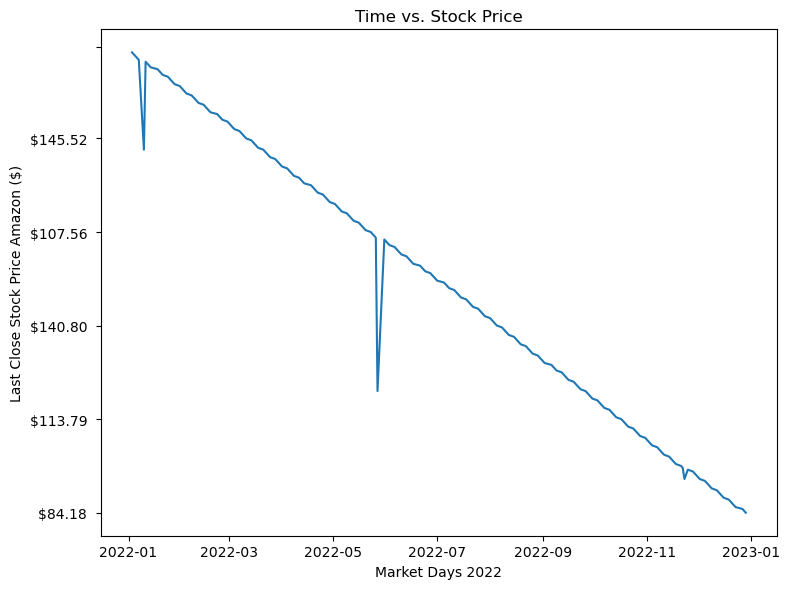

In [126]:
cb_amzn = amazon_SP['Close/Last']
plt.rcParams["figure.figsize"] = [8.00, 6.00]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
ytick_loc = [0, 50, 100, 150, 200, 249]
ax.set_yticks(ytick_loc)

plt.title("Time vs. Stock Price")
plt.xlabel("Market Days 2022")
plt.ylabel("Last Close Stock Price Amazon ($)")
#plt.yticks([0,50,100,150,200,249])
plt.plot(cb_amzn)
plt.savefig('output/amzn_tvsp.png')
plt.show()

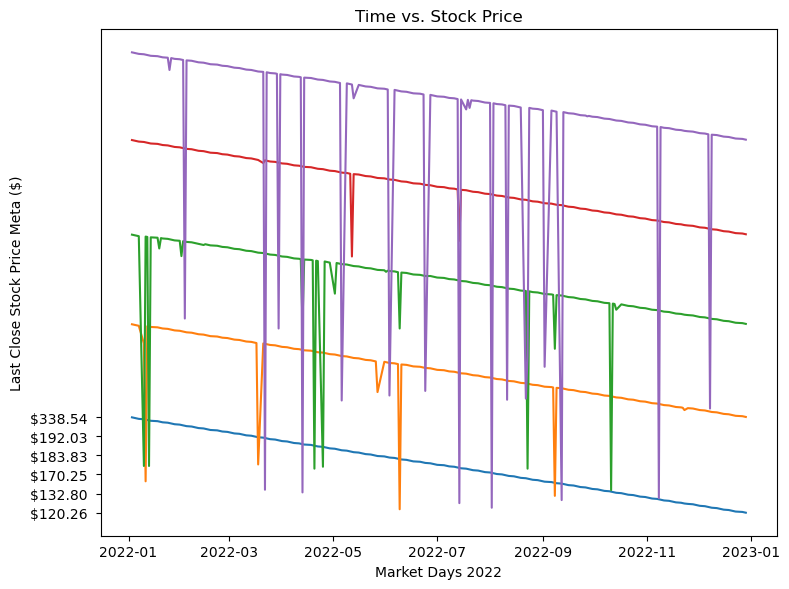

In [98]:
closing_bell = facebook_SP['Close/Last']
plt.plot(closing_bell)

cb_amzn = amazon_SP['Close/Last']
cb_aapl = apple_SP['Close/Last']
cb_nflx = netflix_SP['Close/Last']
cb_goog = google_SP['Close/Last']

plt.plot(cb_amzn)
plt.plot(cb_aapl)
plt.plot(cb_nflx)
plt.plot(cb_goog)

plt.title("Time vs. Stock Price")
plt.xlabel("Market Days 2022")
plt.ylabel("Last Close Stock Price Meta ($)")




plt.yticks([0,50,100,150,200,249])
plt.savefig('output/FB_tvsp.png')
plt.show()

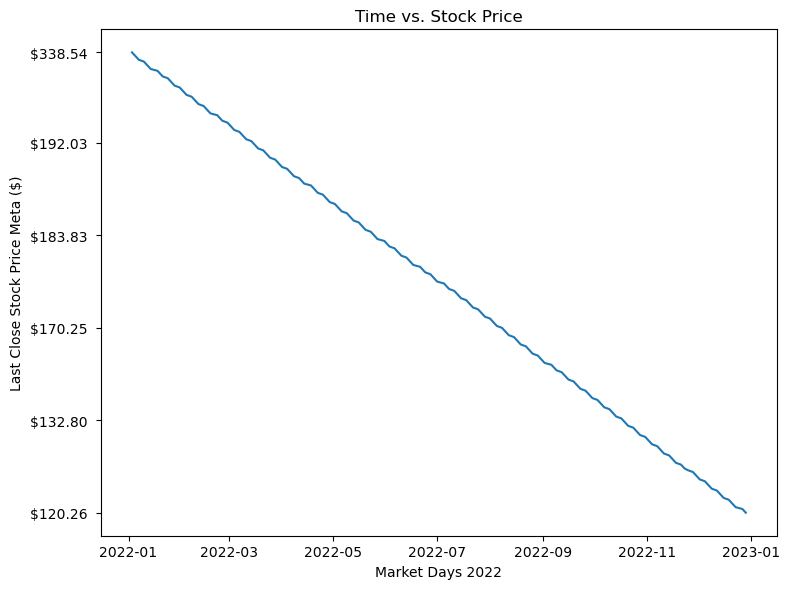

In [86]:
# Plot Facebook Stock Price versus time
closing_bell = facebook_SP['Close/Last']
plt.plot(closing_bell)

plt.title("Time vs. Stock Price")
plt.xlabel("Market Days 2022")
plt.ylabel("Last Close Stock Price Meta ($)")




plt.yticks([0,50,100,150,200,249])
plt.savefig('output/FB_tvsp.png')
plt.show()

In [89]:
# Last = meta['Close/Last']
# # Dates = meta['Date']
# # plt.plot(Dates,Last)
# # plt.show()
# plt.plot(Last)
# plt.show()

In [90]:
# Create a DataFrame for each FAANG company
facebook_df = mergedData.loc[mergedData["Label"] == "Facebook", :]
facebook_df1 = facebook_df.sort_index(ascending=False)


In [91]:
facebook_df

,Label,Date,Close/Last,Volume,Open,High,Low
0,Facebook,12/29/22,$120.26,22366190,$116.40,$121.03,$115.77
1,Facebook,12/28/22,$115.62,19612470,$116.25,$118.15,$115.51
2,Facebook,12/27/22,$116.88,21392310,$117.93,$118.60,$116.05
3,Facebook,12/23/22,$118.04,17796630,$116.03,$118.18,$115.54
4,Facebook,12/22/22,$117.12,23618120,$117.20,$118.62,$114.38
...,...,...,...,...,...,...,...
245,Facebook,1/7/22,$331.79,14722020,$332.74,$337.00,$328.88
246,Facebook,1/6/22,$332.46,27962810,$322.82,$339.17,$322.72
247,Facebook,1/5/22,$324.17,20564520,$333.02,$335.76,$323.84
248,Facebook,1/4/22,$336.53,15997970,$339.95,$343.09,$331.87


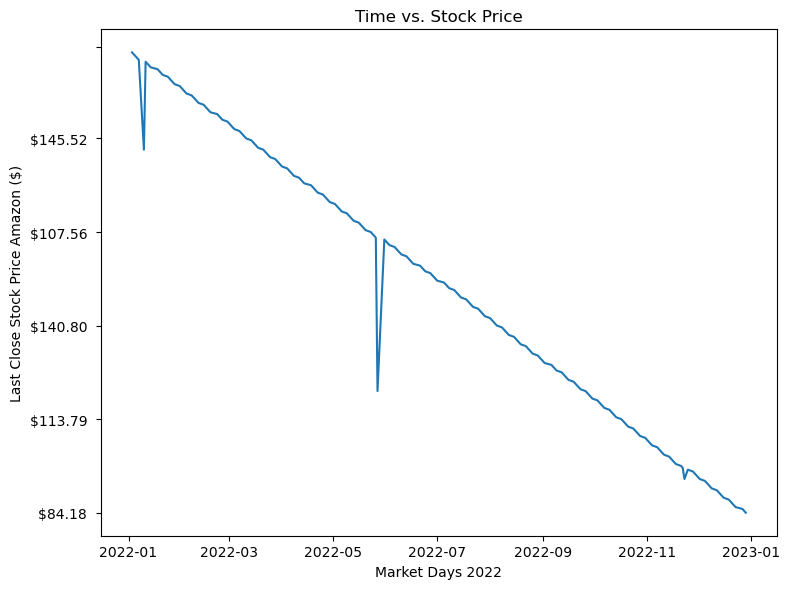

In [126]:
cb_amzn = amazon_SP['Close/Last']
plt.rcParams["figure.figsize"] = [8.00, 6.00]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
ytick_loc = [0, 50, 100, 150, 200, 249]
ax.set_yticks(ytick_loc)

plt.title("Time vs. Stock Price")
plt.xlabel("Market Days 2022")
plt.ylabel("Last Close Stock Price Amazon ($)")
#plt.yticks([0,50,100,150,200,249])
plt.plot(cb_amzn)
plt.savefig('output/amzn_tvsp.png')
plt.show()

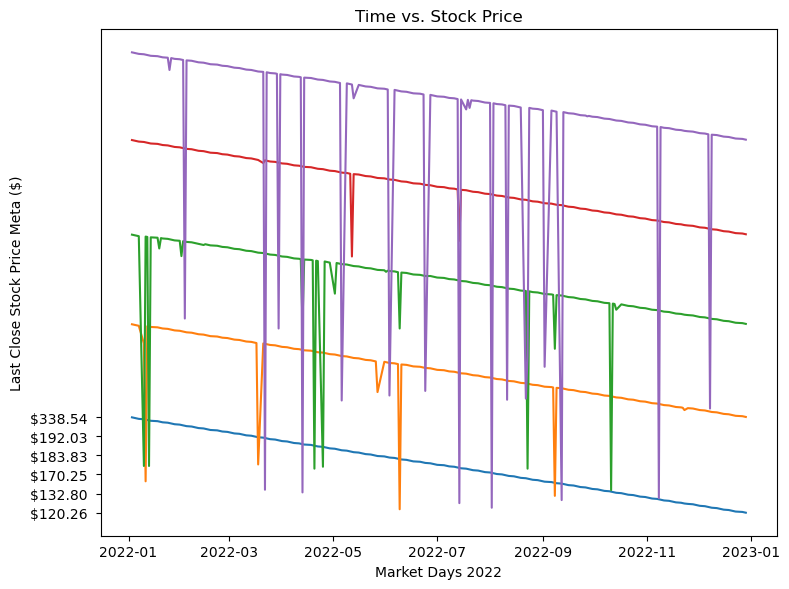

In [98]:
closing_bell = facebook_SP['Close/Last']
plt.plot(closing_bell)

cb_amzn = amazon_SP['Close/Last']
cb_aapl = apple_SP['Close/Last']
cb_nflx = netflix_SP['Close/Last']
cb_goog = google_SP['Close/Last']

plt.plot(cb_amzn)
plt.plot(cb_aapl)
plt.plot(cb_nflx)
plt.plot(cb_goog)

plt.title("Time vs. Stock Price")
plt.xlabel("Market Days 2022")
plt.ylabel("Last Close Stock Price Meta ($)")




plt.yticks([0,50,100,150,200,249])
plt.savefig('output/FB_tvsp.png')
plt.show()

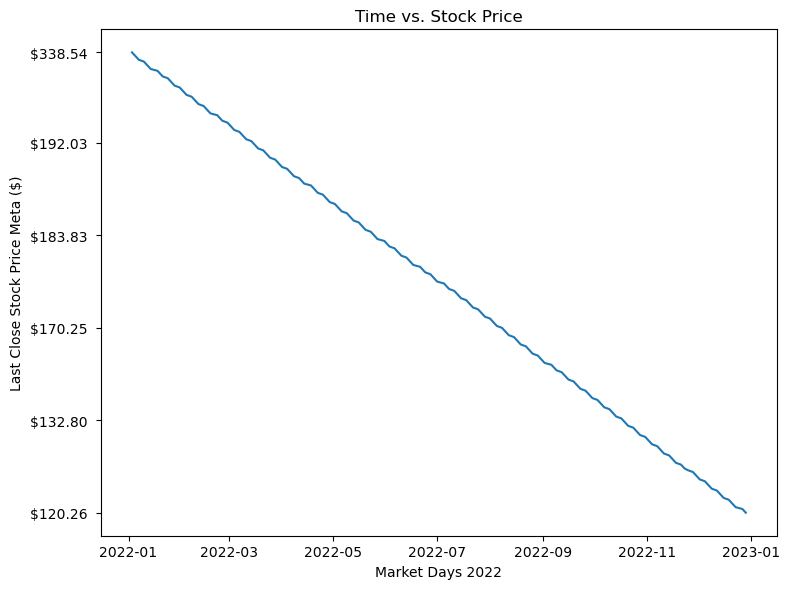

In [86]:
# Plot Facebook Stock Price versus time
closing_bell = facebook_SP['Close/Last']
plt.plot(closing_bell)

plt.title("Time vs. Stock Price")
plt.xlabel("Market Days 2022")
plt.ylabel("Last Close Stock Price Meta ($)")




plt.yticks([0,50,100,150,200,249])
plt.savefig('output/FB_tvsp.png')
plt.show()

In [89]:
# Last = meta['Close/Last']
# # Dates = meta['Date']
# # plt.plot(Dates,Last)
# # plt.show()
# plt.plot(Last)
# plt.show()

In [90]:
# Create a DataFrame for each FAANG company
facebook_df = mergedData.loc[mergedData["Label"] == "Facebook", :]
facebook_df1 = facebook_df.sort_index(ascending=False)


In [91]:
facebook_df

,Label,Date,Close/Last,Volume,Open,High,Low
0,Facebook,12/29/22,$120.26,22366190,$116.40,$121.03,$115.77
1,Facebook,12/28/22,$115.62,19612470,$116.25,$118.15,$115.51
2,Facebook,12/27/22,$116.88,21392310,$117.93,$118.60,$116.05
3,Facebook,12/23/22,$118.04,17796630,$116.03,$118.18,$115.54
4,Facebook,12/22/22,$117.12,23618120,$117.20,$118.62,$114.38
...,...,...,...,...,...,...,...
245,Facebook,1/7/22,$331.79,14722020,$332.74,$337.00,$328.88
246,Facebook,1/6/22,$332.46,27962810,$322.82,$339.17,$322.72
247,Facebook,1/5/22,$324.17,20564520,$333.02,$335.76,$323.84
248,Facebook,1/4/22,$336.53,15997970,$339.95,$343.09,$331.87


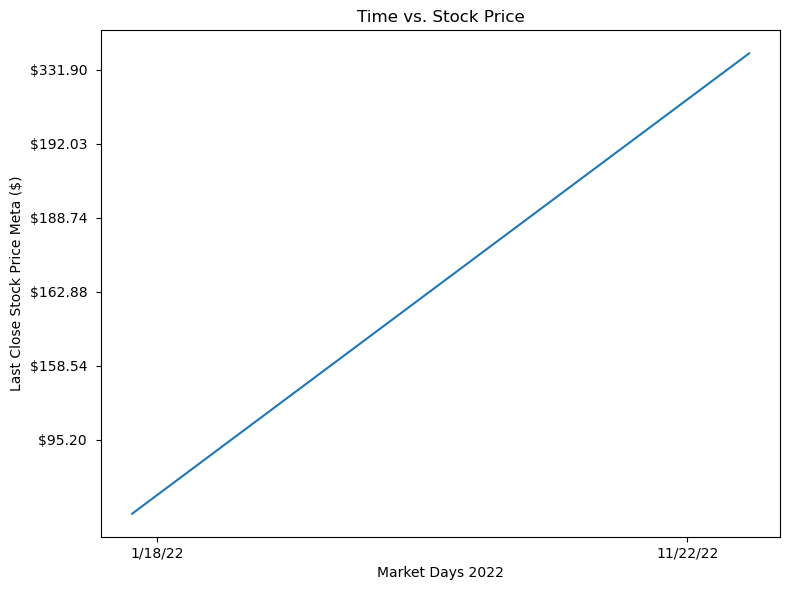

In [92]:
# Stock Price vs. Time Plot Meta
Close = facebook_df["Close/Last"]
Date = facebook_df1["Date"]
locator = AutoDateLocator()
formatter = AutoDateFormatter(locator)
#rule = rrulewrapper(MONTHLY, bywednesday=1, interval=1)
#loc = RRuleLocator(rule)
#formatter = DateFormatter('%m/%d/%y')
#date1 = datetime.date(2022)

plt.rcParams["figure.figsize"] = [8.00, 6.00]
plt.rcParams["figure.autolayout"] = True


fig, ax = plt.subplots()
ytick_loc = [360, 320, 280, 240, 200, 160, 120, 80, 40]
ax.set_yticks(ytick_loc)


#axes.xaxis.set_major_formatter(fmt)
#axes.tick_params(rotation=10)

yAxis = Close
xAxis = Date
plt.plot(Date,Close)
plt.title("Time vs. Stock Price")
plt.xlabel("Market Days 2022")
plt.ylabel("Last Close Stock Price Meta ($)")

# linReg(xAxis,yAxis,x_lin_plot,y_lin_plot,yLabel)
#plt.gcf().autofmt_xdate()
#plt.yticks([10,224])
plt.xticks([10,224])
plt.show()

In [71]:
# How do interest rate changes from the Federal Reserve affect stock prices during 2022?

TreasuryRatesDataPath = "data/TreasuryRates.csv"
TreasuryRates_csv = pd.read_csv(TreasuryRatesDataPath)
TreasuryRates_csv.insert(0, "Label", "Treasury Rates")
tr = TreasuryRates_csv.iloc[45:293, :]
fb = facebook_csv.iloc[45:295, :]

mergeIntRateFB = pd.merge(fb, tr, on = "Date", how = "outer")
mergeIntRateFB.dropna(axis='columns')
mergeIntRateFB.fillna(0)

,Label_x,Date,Close/Last,Volume,Open,High,Low,Label_y,LT Composite > 10 Yrs,Treasury 20-Yr CMT,Extrapolation Factor
0,Facebook,12/28/22,$115.62,19612470,$116.25,$118.15,$115.51,Treasury Rates,0.009828,0.007317,0.0
1,Facebook,12/27/22,$116.88,21392310,$117.93,$118.60,$116.05,Treasury Rates,0.025189,0.027569,0.0
2,Facebook,12/23/22,$118.04,17796630,$116.03,$118.18,$115.54,Treasury Rates,0.023196,0.020460,0.0
3,Facebook,12/22/22,$117.12,23618120,$117.20,$118.62,$114.38,Treasury Rates,-0.005128,-0.005089,0.0
4,Facebook,12/21/22,$119.76,20392800,$116.70,$120.34,$115.62,Treasury Rates,0.000000,-0.002538,0.0
...,...,...,...,...,...,...,...,...,...,...,...
245,Facebook,1/6/22,$332.46,27962810,$322.82,$339.17,$322.72,Treasury Rates,0.000000,0.000000,0.0
246,Facebook,1/5/22,$324.17,20564520,$333.02,$335.76,$323.84,Treasury Rates,0.009709,0.009524,0.0
247,Facebook,1/4/22,$336.53,15997970,$339.95,$343.09,$331.87,Treasury Rates,0.030000,0.024390,0.0
248,Facebook,1/3/22,$338.54,14562850,$338.30,$341.08,$337.19,Treasury Rates,0.058201,0.056701,0.0


In [74]:
mergeIntRateFB.fillna(0).to_csv("output/mergeIntRateFB.csv")

In [56]:
# Convert Close/Last column (series) from string ($) to float.
# longTermRates = mergeIntRateFB['LT Composite > 10 Yrs']
# dailyFB_price = mergeIntRateFB['Close/Last']

# s = pd.Series(dailyFB_price)
# pd.to_numeric(s,errors='ignore')

# mergeIntRateFB = {'LT Composite > 10 Yrs': longTermRates,
#              'Close/Last': dailyFB_price
#              }
# mergeIntRateFB_df = pd.Series(longTermRates,dailyFB_price)
# pd.to_numeric(mergeIntRateFB_df)
#mergeIntRateFB_df['Close/Last'] = mergeIntRateFB_df['Close/Last'].astype('float')
#mergeIntRateFB_df.head()



In [57]:
# provide function to remove dollar signs from 'Close/Last'
# https://pbpython.com/currency-cleanup.html
def clean_currency(x):
    if isinstance(x,str):
        return(x.replace('$','').replace(',',''))
    return(x)



In [75]:
# apply clean_currency function to 'Close/Last' to remove strings ($)
fill_mergeIRF = mergeIntRateFB.fillna(0)

clean_df = fill_mergeIRF['Close/Last'].apply(clean_currency).astype('float')
clean_df

0      115.62
1      116.88
2      118.04
3      117.12
4      119.76
        ...  
245    332.46
246    324.17
247    336.53
248    338.54
249    336.35
Name: Close/Last, Length: 250, dtype: float64

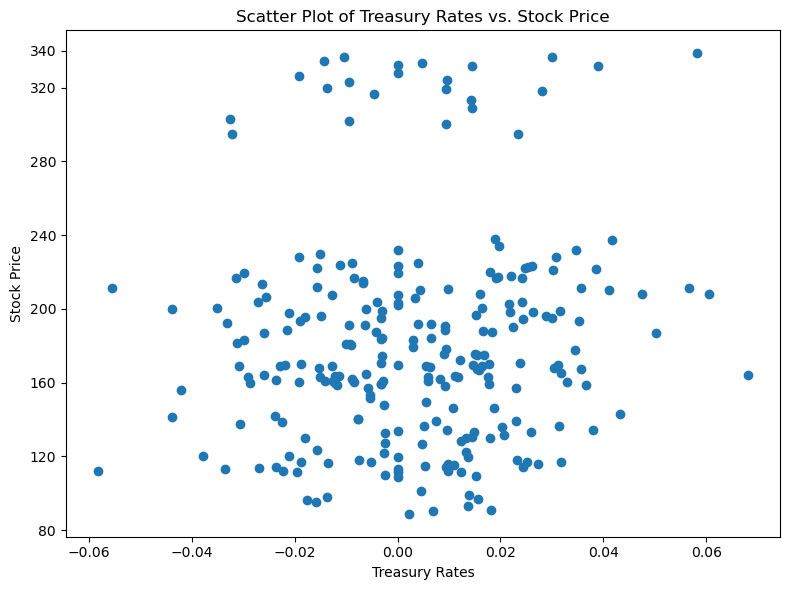

In [76]:
#mergeIntRateFB["Close/Last"] = mergeIntRateFB["Close/Last"].astype(float)
LastClose = clean_df#mergeIntRateFB["Close/Last"]
IntRate = fill_mergeIRF["LT Composite > 10 Yrs"]
plt.rcParams["figure.figsize"] = [8.00, 6.00]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
ytick_loc = [40, 80, 120, 160, 200, 240, 280, 320, 340]
ax.set_yticks(ytick_loc)
#plt.tick_params(left = False,labelleft = False)
# Incorporate the other graph properties
plt.title("Scatter Plot of Treasury Rates vs. Stock Price")
plt.xlabel("Treasury Rates")
plt.ylabel("Stock Price")
plt.scatter(IntRate,LastClose)
plt.show()

In [77]:
mergeIntRateFB['LT Composite > 10 Yrs'].isnull().sum()

2

In [78]:
mergeIntRateFB['Close/Last'].isnull().sum()

0

The r-value is 0.08853072521817154


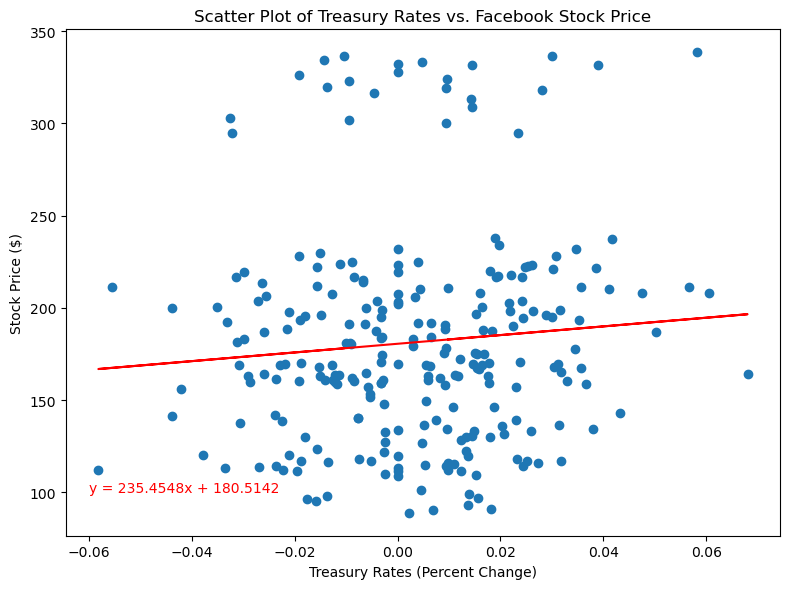

In [135]:
# Linear regression on treasury rates vs. stock price

yAxis = clean_df
xAxis = IntRate

y_lin_plot = 100
x_lin_plot = -0.06
plt.title("Scatter Plot of Treasury Rates vs. Facebook Stock Price")
yLabel = "Stock Price ($)"
xLabel = "Treasury Rates (Percent Change)"
linReg(xAxis,yAxis,x_lin_plot,y_lin_plot,yLabel)
plt.savefig('output/FB_trsp.png')
plt.show()

In [132]:
# Check for null values in amazon data.
amazon_SP['Close/Last'].isnull().sum()

0

In [134]:
# Convert strings ($) to float values.
clean_amazon_SP = amazon_SP['Close/Last'].apply(clean_currency).astype('float')
clean_amazon_SP.head()

Date
2022-12-29    84.18
2022-12-28    81.82
2022-12-27    83.04
2022-12-23    85.25
2022-12-22    83.79
Name: Close/Last, dtype: float64

The r-value is 0.12106143145073066


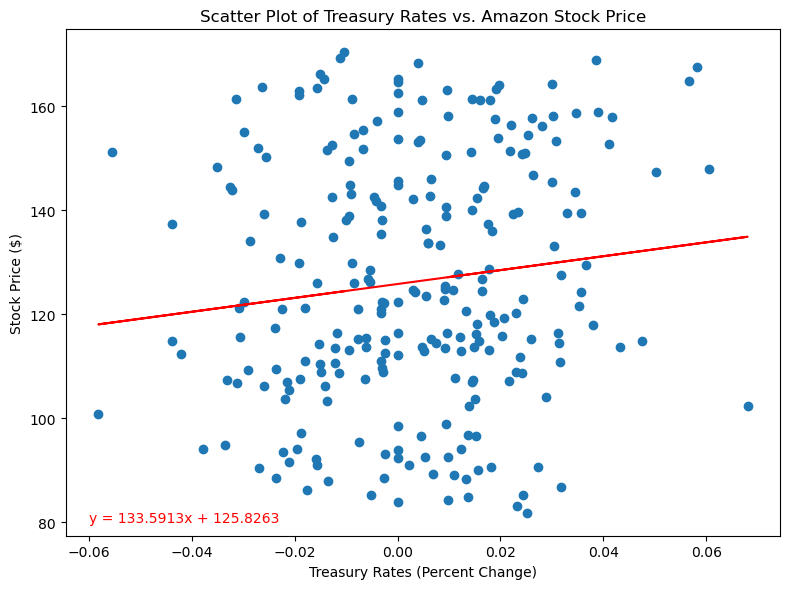

In [164]:
# Create Scatter Plot and Linear Regression for Amazon versus treasury rates.
yAxis = clean_amazon_SP
xAxis = IntRate
y_lin_plot = 80
x_lin_plot = -0.06
plt.title("Scatter Plot of Treasury Rates vs. Amazon Stock Price")
yLabel = "Stock Price ($)"
xLabel = "Treasury Rates (Percent Change)"
linReg(xAxis,yAxis,x_lin_plot,y_lin_plot,yLabel)
plt.savefig('output/AM_trsp.png')
plt.show()

In [140]:
# Check for null values in apple data.
apple_SP['Close/Last'].isnull().sum()

0

In [141]:
# Convert strings ($) to float values.
clean_apple_SP = apple_SP['Close/Last'].apply(clean_currency).astype('float')
clean_apple_SP.head()

Date
2022-12-29    129.61
2022-12-28    126.04
2022-12-27    130.03
2022-12-23    131.86
2022-12-22    132.23
Name: Close/Last, dtype: float64

The r-value is 0.08572709823382273


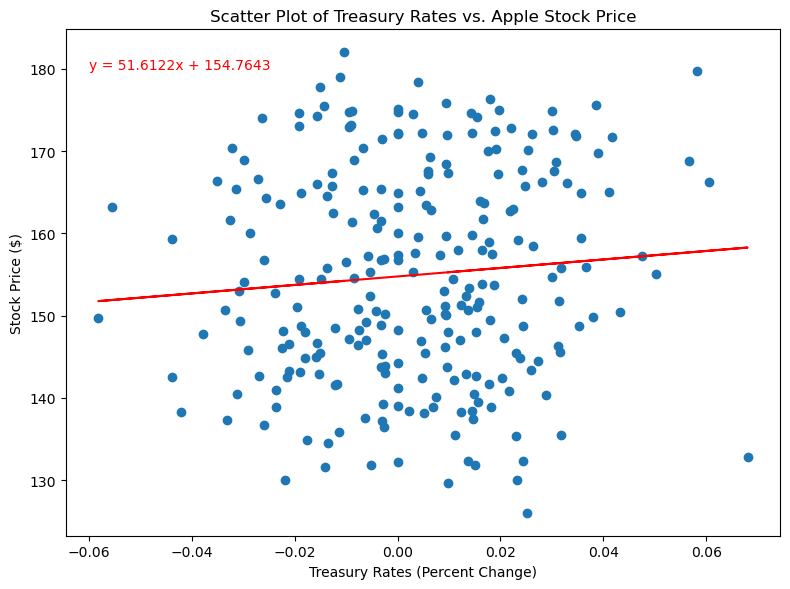

In [158]:
# Create Scatter Plot and Linear Regression for Apple versus treasury rates.
yAxis = clean_apple_SP
xAxis = IntRate
y_lin_plot = 180
x_lin_plot = -0.06
plt.title("Scatter Plot of Treasury Rates vs. Apple Stock Price")
yLabel = "Stock Price ($)"
xLabel = "Treasury Rates (Percent Change)"
linReg(xAxis,yAxis,x_lin_plot,y_lin_plot,yLabel)
plt.savefig('output/AP_trsp.png')
plt.show()

In [143]:
# Check for null values in apple data.
netflix_SP['Close/Last'].isnull().sum()

0

In [146]:
# Convert strings ($) to float values.
clean_netflix_SP = netflix_SP['Close/Last'].apply(clean_currency).astype('float')
clean_netflix_SP.head()

Date
2022-12-29    291.12
2022-12-28    276.88
2022-12-27    284.17
2022-12-23    294.97
2022-12-22    297.75
Name: Close/Last, dtype: float64

The r-value is 0.07926426513180036


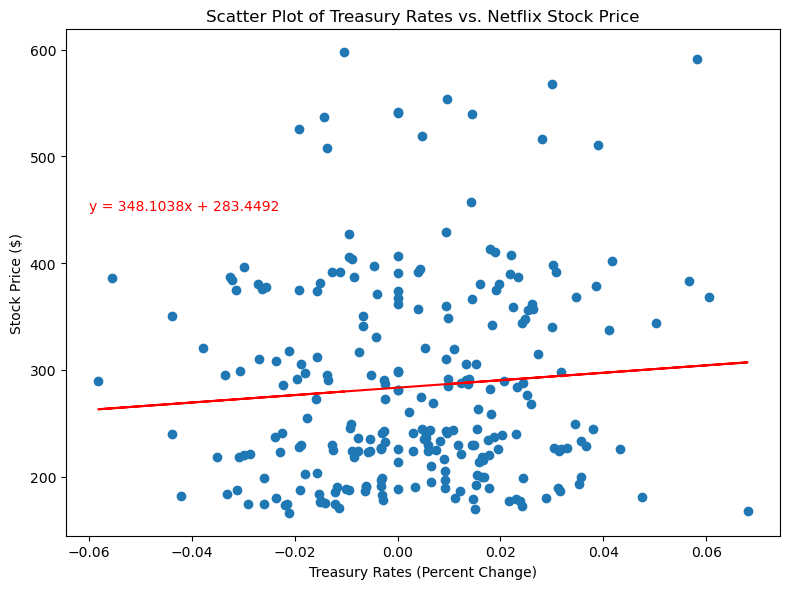

In [159]:
# Create Scatter Plot and Linear Regression for Netflix versus treasury rates.
yAxis = clean_netflix_SP
xAxis = IntRate
y_lin_plot = 450
x_lin_plot = -0.06
plt.title("Scatter Plot of Treasury Rates vs. Netflix Stock Price")
yLabel = "Stock Price ($)"
xLabel = "Treasury Rates (Percent Change)"
linReg(xAxis,yAxis,x_lin_plot,y_lin_plot,yLabel)
plt.savefig('output/NX_trsp.png')
plt.show()

In [150]:
# Check for null values in apple data.
google_SP['Close/Last'].isnull().sum()

0

In [151]:
# Convert strings ($) to float values.
clean_google_SP = google_SP['Close/Last'].apply(clean_currency).astype('float')
clean_google_SP.head()

Date
2022-12-29    88.95
2022-12-28    86.46
2022-12-27    87.93
2022-12-23    89.81
2022-12-22    88.26
Name: Close/Last, dtype: float64

The r-value is 0.10081991913397972


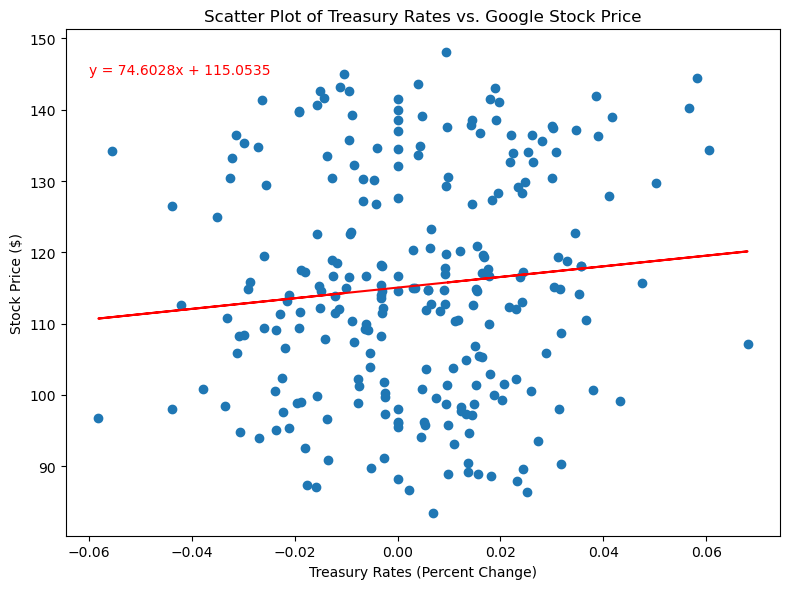

In [160]:
# Create Scatter Plot and Linear Regression for Google versus treasury rates.
yAxis = clean_google_SP
xAxis = IntRate
y_lin_plot = 145
x_lin_plot = -0.06
plt.title("Scatter Plot of Treasury Rates vs. Google Stock Price")
yLabel = "Stock Price ($)"
xLabel = "Treasury Rates (Percent Change)"
linReg(xAxis,yAxis,x_lin_plot,y_lin_plot,yLabel)
plt.savefig('output/GO_trsp.png')
plt.show()

In [ ]:
# Reduce y ticks for visbility of y values

plt.scatter(IntRate,LastClose)
#plt.yticks(np.arange(min(LastClose), max(x) + 1, 1.0))
plt.ylabel("Stock Price ($)")
plt.xlabel("Treasury Rates")
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])


plt.show()

    

In [ ]:
# Format y ticks correctly using matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

yax = plt.subplots()
yax.scatter(IntRate,LastClose)

# Make a plot with major ticks that are multiples of 20 and minor ticks multiples of 5.  Label major ticks with '0f'
# formatting but don't label minor ticks.  
yax.yaxis.set_major_locator(MultipleLocator(20))
yax.yaxis.set_major_formatter('{x:.0f}')

# For the minor ticks, us no labels; default NullFormatter
yax.yaxis.set_minor_locator(MultipleLocator(10))

plt.show()

In [ ]:
print(LastClose)

In [ ]:
# Format range and interval of ticks on the y-axis
plt.scatter(IntRate,LastClose)
listOf_Yticks = np.arange(0,300,20)
plt.yticks(listOf_Yticks)

plt.show()

In [ ]:
plt.figure(figsize = (12,8))
plt.tick_params(left = False,labelleft = False)

plt.scatter(IntRate,LastClose)
plt.show()

In [ ]:
ax = plt.scatter.axes(IntRate,LastClose)
#plt.scatter(IntRate,LastClose)
ax.set_yticks([20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340])
plt.show()